# E-Commerce Data Analysis: 

The available dataset is about the sales records of an online shops which offer their survices in different countries across the world. The purpose of this project is to predict the future or direct the stores owners about the possible growth in future. The available dataset is from december 2010 to december 2011. Huge amount of dataset is is available from each day of this whole one year. The possible growth can be predicted with finding, the highest demanded stock, country with highest sales, busiest day, month of the year and all other features like that. It will give us insight of dataset and let us know that about the possible actions for future for growth purposes. 

## Methodology: 

### Importing All Necessary Libraries: 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

### Import Dataset:

In [2]:
path = r'D:\Freelancing\Python_Freelancing\December_2021\NaseemMaldivesExploratoryDataAnalysis'
df = pd.read_csv(path+'\OnlineRetail.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Cleaning Dataset:

In [5]:
df = df[df['UnitPrice']>0]
df = df[df['Quantity']>0]

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Splitting Sales Based on Countries: 

In [9]:
UniqueCountries = df['Country'].unique()

In [10]:
UniqueCountries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Thesea are all the countries included in the datasets. 

In [72]:
len(UniqueCountries)

38

The available dataset contain sales in 38 countries of the world. It mostly includes european countries along with USA, and central asian countries. 

In [73]:
len(df['Description'].unique())

4026

About 4026 types of products are available. 

### Split Dataframe based on Counties: 

In [14]:
dfUnitedKingdom = df[df['Country']== 'United Kingdom']
dfFrance = df[df['Country']=='France']
dfAustralia = df[df['Country']=='Australia']
dfNetherlands = df[df['Country']=='Netherlands']
dfGermany = df[df['Country']=='Germany']
dfNorway = df[df['Country']=='Norway']
dfEIRE = df[df['Country']=='EIRE']
dfSwitzerland = df[df['Country']=='Switzerland']
dfSpain = df[df['Country']=='Spain']
dfPoland = df[df['Country']=='Poland']
dfPortugal = df[df['Country']=='Portugal']
dfItaly = df[df['Country']=='Italy']
dfBelgium = df[df['Country']=='Belgium']
dfLithuania = df[df['Country']=='Lithuania']
dfJapan = df[df['Country']=='Japan']
dfIceland = df[df['Country']=='Iceland']
dfChannelIsland = df[df['Country']=='Channel Islands']
dfDenmark = df[df['Country']=='Denmark']
dfCyprus = df[df['Country']=='Cyprus']
dfSweden = df[df['Country']=='Sweden']
dfAustria = df[df['Country']=='Austria']
dfIsrael = df[df['Country']=='Israel']
dfFinland = df[df['Country']=='Finland']
dfBahrain = df[df['Country']=='Bahrain']
dfGreece = df[df['Country']=='Greece']
dfHongKong = df[df['Country']=='Hong Kong']
dfSingapore = df[df['Country']=='Singapore']
dfLebanon = df[df['Country']=='Lebanon']
dfUnitedArabEmirates = df[df['Country']=='United Arab Emirates']
dfSaudiArabia = df[df['Country']=='Saudi Arabia']
dfCzehRepublic = df[df['Country']=='Czech Republic']
dfCaneda = df[df['Country']=='Canada']
dfBrazil = df[df['Country']=='Brazil']
dfUSA = df[df['Country']=='USA']
dfEuropeanCommunity = df[df['Country']=='European Community']
dfMalta = df[df['Country']=='Malta']
dfRSA = df[df['Country']=='RSA']


### Sales in each Countries: 

In [15]:
x = ['UK', 'Frnc', 'Aus', 'Neth','Jerm','Norw','EIRE', 'Switz','Spn','Pold','Portug','Italy', 'Belj','Lithu','Jpn','Isld','Chel_Isl',
     "Denk","Cypr","Sweden","Austria","Isrl","Find","behrn","Grece","HongKong",'Singpor',"Lebn","UAE", "SA","CzP","Cnda","brazl","USA","EC","Mlta","RSA"]
y = [len(dfUnitedKingdom), len(dfFrance), len(dfAustralia), len(dfNetherlands),len(dfGermany),len(dfNorway),len(dfEIRE),len(dfSwitzerland)
    ,len(dfSpain),len(dfPoland),len(dfPortugal),len(dfItaly),len(dfBelgium),len(dfLithuania),len(dfJapan),len(dfIceland),
    len(dfChannelIsland),len(dfDenmark),len(dfCyprus),len(dfSweden),len(dfAustria),len(dfIsrael),len(dfFinland),len(dfBahrain),
    len(dfGreece),len(dfHongKong),len(dfSingapore),len(dfLebanon),len(dfUnitedArabEmirates),len(dfSaudiArabia),len(dfCzehRepublic),len(dfCaneda),len(dfBrazil)
    ,len(dfUSA),len(dfEuropeanCommunity),len(dfMalta),len(dfRSA)]

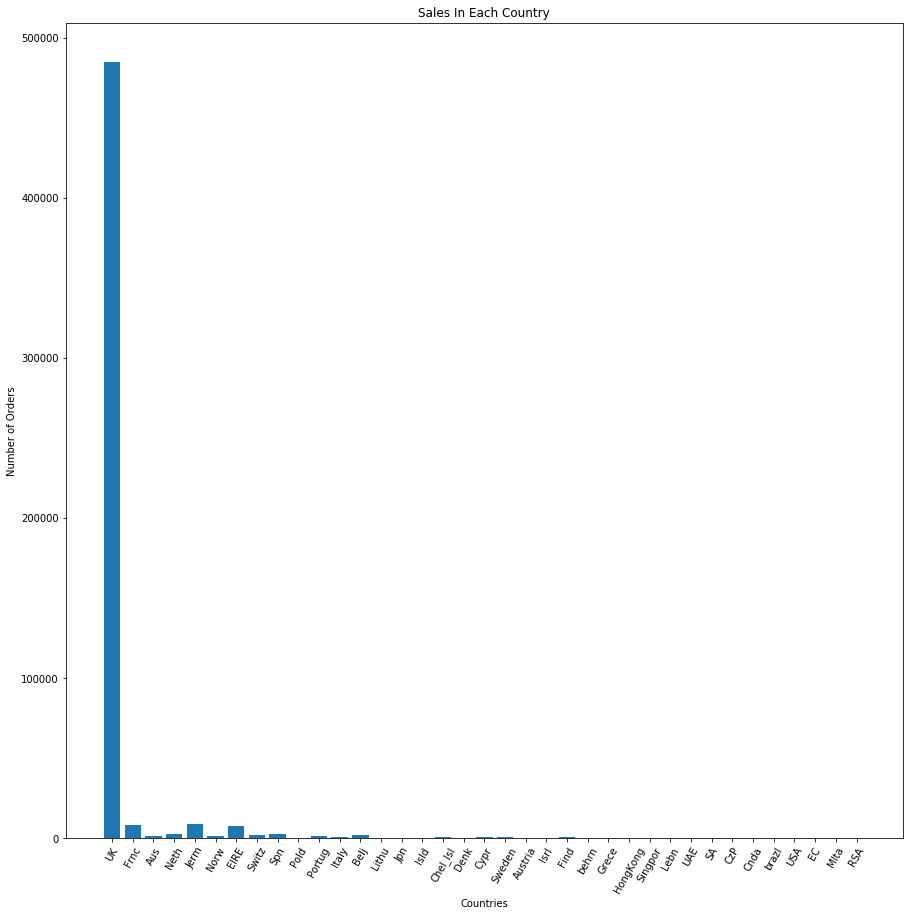

In [74]:
plt.figure(figsize=(15,15))
plt.bar(x,y)
plt.xticks(rotation = 60)
plt.xlabel("Countries")
plt.ylabel("Number of Orders")
plt.title("Sales In Each Country")
plt.show()

Above figure shows the number of sales in each country. Figure also illustrates that the number of sales in UK (United Kingdom) is very large than others. This is the reasons that the sales of other countries seems negligible with United kindgom's sales. The sales of UK reached upto 0.5 millions. No other country has sales greater than 0.05 millions. Even all of them are below this. To better understand and know the trend of all other countries, we need to plot it with each other. 

In [19]:
x1 = ['Frnc', 'Aus', 'Neth','Jerm','Norw','EIRE', 'Switz','Spn','Pold','Portug','Italy', 'Belj','Lithu','Jpn','Isld','Chel_Isl',
     "Denk","Cypr","Sweden","Austria","Isrl","Find","behrn","Grece","HongKong",'Singpor',"Lebn","UAE", "SA","CzP","Cnda","brazl","USA","EC","Mlta","RSA"]
y1 = [len(dfFrance), len(dfAustralia), len(dfNetherlands),len(dfGermany),len(dfNorway),len(dfEIRE),len(dfSwitzerland)
    ,len(dfSpain),len(dfPoland),len(dfPortugal),len(dfItaly),len(dfBelgium),len(dfLithuania),len(dfJapan),len(dfIceland),
    len(dfChannelIsland),len(dfDenmark),len(dfCyprus),len(dfSweden),len(dfAustria),len(dfIsrael),len(dfFinland),len(dfBahrain),
    len(dfGreece),len(dfHongKong),len(dfSingapore),len(dfLebanon),len(dfUnitedArabEmirates),len(dfSaudiArabia),len(dfCzehRepublic),len(dfCaneda),len(dfBrazil)
    ,len(dfUSA),len(dfEuropeanCommunity),len(dfMalta),len(dfRSA)]

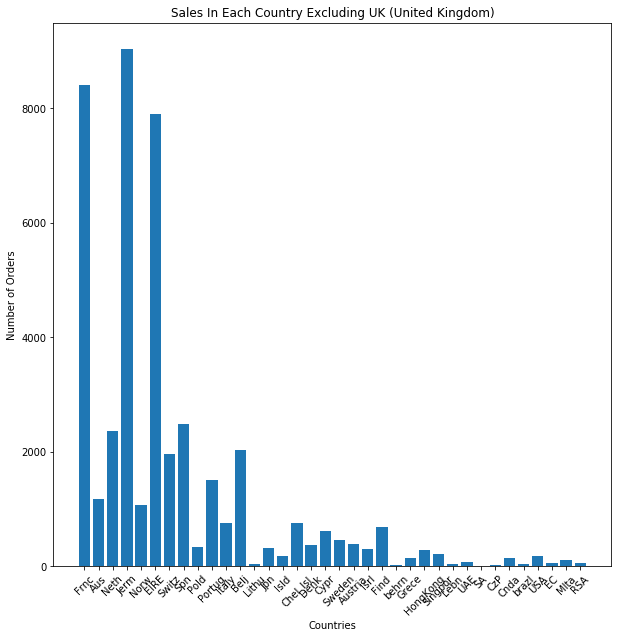

In [80]:
plt.figure(figsize=(10,10))
plt.bar(x1,y1)
plt.xticks(rotation = 45)
plt.xlabel("Countries")
plt.ylabel("Number of Orders")
plt.title("Sales In Each Country Excluding UK (United Kingdom)")
plt.show()

Above figure shows the sales of different products in different countries excluding United Kingdom. It also illustrates that France, Germany, and EIRE are in the top of the list. Number of sales is greater in these three countries after United kingdom. 

### Split InvoiceDate into Date and Time: 

In [21]:
df['Date'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/01/2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/01/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/01/2010


In [76]:
df['Date'] = pd.to_datetime(df['Date'])


### Busiest Day of the Week:

In [29]:
df['day'] = df['Date'].dt.day_name()

In [31]:
df['TotalRevenue'] = df['Quantity']*df['UnitPrice']

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,day,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,20.34


Here date and TotalRevenue columns have been added to the original dataframe for further processing. 

In [33]:
days = df['day'].unique().tolist()

ReveneuSum = []
for day in days:
    sum= df[df['day']==day]['TotalRevenue'].sum() 
    ReveneuSum.append(sum)

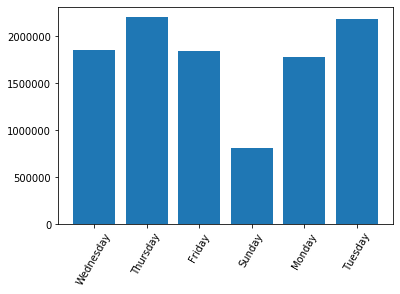

In [36]:
plt.bar(days,ReveneuSum)
plt.xticks(rotation = 60)
plt.show()

The biggest revenue is generated on Thursday. The second day on which the revenue is greater is Tuesday and Sunday is the least revenue day among all. It is concluded that the busiest day of the week is Thursday or we can say Tuesday.  

### Product with Highest number of Orders: 

At this part, we conldued which product is ordered more among all. This is one of the most important features to be extracted while doing data analysis to met the needs of customers. 

In [37]:
df['StockCode'].value_counts()

85123A    2265
85099B    2112
22423     2017
47566     1706
20725     1595
          ... 
16169N       1
84614A       1
77079        1
90020        1
84795C       1
Name: StockCode, Length: 3922, dtype: int64

In [38]:
df[df['StockCode']=='85123A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,day,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,15.30
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,15.30
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,15.30
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,2010-12-01,Wednesday,163.20
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,2010-12-01,Wednesday,81.60
...,...,...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,12/8/2011 16:30,5.79,NaN,United Kingdom,2011-12-08,Thursday,5.79
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55,17675.0,United Kingdom,2011-12-08,Thursday,81.60
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95,15796.0,United Kingdom,2011-12-08,Thursday,17.70
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,12/9/2011 10:03,5.79,NaN,United Kingdom,2011-12-09,Friday,17.37


Among all the product, "WHITE HANGING HEART T-LIGHT HOLDER" is more sold than all others. 

### Revenue by Country Over Time: 

In [53]:
dfFranceRevenue = df[df['Country'] == 'France']
dfEIRERevenue = df[df['Country'] == 'EIRE']
dfGermanyRevenue = df[df['Country'] == 'Germany']

In [64]:
dfGermanyRevenue.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,day,TotalRevenue,Month
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany,2010-12-01,Wednesday,17.7,December
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany,2010-12-01,Wednesday,15.3,December
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany,2010-12-01,Wednesday,10.2,December
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany,2010-12-01,Wednesday,19.8,December
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany,2010-12-01,Wednesday,23.4,December


In [65]:
dfFranceRevenue['Month'] = dfFranceRevenue['Date'].dt.month_name()
dfEIRERevenue['Month'] = dfEIRERevenue['Date'].dt.month_name()
dfGermanyRevenue['Month'] = dfGermanyRevenue['Date'].dt.month_name()

C:\Users\musarat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\musarat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\musarat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [67]:
monthsFrance = dfFranceRevenue['Month'].unique().tolist()

ReveneuSumFrance = []
for month in monthsFrance:
    sum= dfFranceRevenue[dfFranceRevenue['Month']==month]['TotalRevenue'].sum() 
    ReveneuSumFrance.append(sum)

In [43]:
monthsEIRE = dfEIRERevenue['Month'].unique().tolist()

ReveneuSumEIRE = []
for month in monthsEIRE:
    sum= dfEIRERevenue[dfEIRERevenue['Month']==month]['TotalRevenue'].sum() 
    ReveneuSumEIRE.append(sum)

In [68]:
monthsGermany = dfGermanyRevenue['Month'].unique().tolist()

ReveneuSumGermany = []
for month in monthsGermany:
    sum= dfGermanyRevenue[dfGermanyRevenue['Month']==month]['TotalRevenue'].sum() 
    ReveneuSumGermany.append(sum)

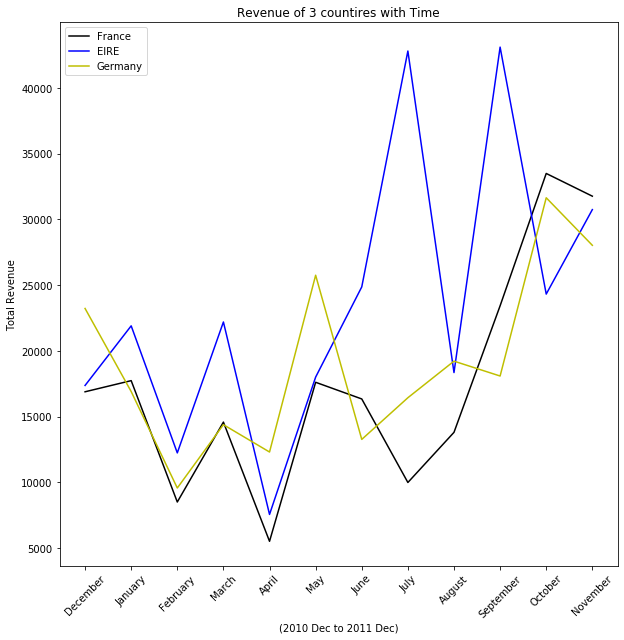

In [85]:
plt.figure(figsize=(10,10))
plt.plot(monthsFrance, ReveneuSumFrance, 'k',label = 'France')
plt.plot(monthsEIRE, ReveneuSumEIRE,'b', label = 'EIRE')
plt.plot(monthsGermany, ReveneuSumGermany,'y', label = 'Germany')
plt.xticks(rotation = 45)
plt.xlabel("(2010 Dec to 2011 Dec)")
plt.ylabel("Total Revenue")
plt.title("Revenue of 3 countires with Time")
plt.legend(loc="upper left")

plt.show()

This figure illustrates the behavior of Total Revenue with respect to time. Starting from december 2010, the total revenue is increased till december 2011. Overall there is an increasing trend in the figure. At July and September, EIRE shows greater revenue than other. While the other two countries shows dip in their revenue in these two months. For the next year it can be predicted that there migh be another peak in EIRE in these two months. Germany shows a peak in may and october 2011 while France shows peaks in october and November. Overall EIRE has the highest TotalRevenue than France and Germany.  